In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
user_data = pd.read_csv("user_attributes.csv")

In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               400 non-null    int64  
 1   age                   400 non-null    int64  
 2   cash_incoming_30days  400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [7]:
user_data.head()

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53


In [8]:
user_data.isnull().sum()

,0
user_id,0
age,0
cash_incoming_30days,0


In [9]:
print("\nUnique values per column:")
for column in user_data.columns:
    print(f"{column}: {user_data[column].nunique()}")


Unique values per column:
user_id: 400
age: 56
cash_incoming_30days: 400


In [10]:
duplicates = user_data.duplicated()
print("Total Duplicates:", duplicates.sum())

Total Duplicates: 0


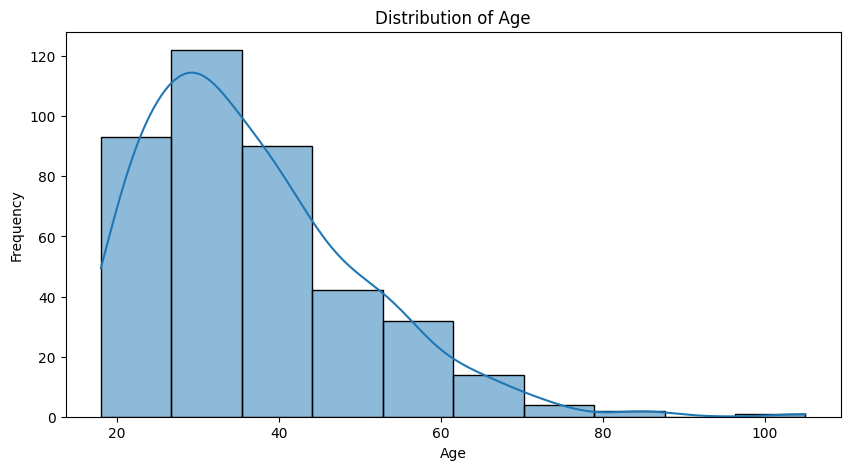

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(user_data['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

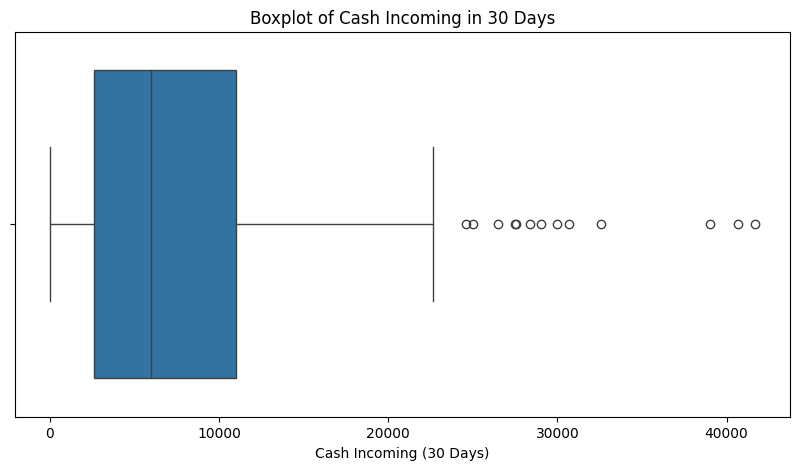

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=user_data['cash_incoming_30days'])
plt.title('Boxplot of Cash Incoming in 30 Days')
plt.xlabel('Cash Incoming (30 Days)')
plt.show()

In [15]:
q1, q3 = np.percentile(user_data['cash_incoming_30days'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = user_data[(user_data['cash_incoming_30days'] < lower_bound) |
                     (user_data['cash_incoming_30days'] > upper_bound)]
print(f"Number of outliers in cash_incoming_30days: {outliers.shape[0]}")

Number of outliers in cash_incoming_30days: 13


cash_incoming_30days represents real-world financial data derived from SMS transaction messages. This data is a reflection of the borrower’s financial activity, and extreme values could be meaningful for the analysis.


Thus we will not drop the outliers in this case

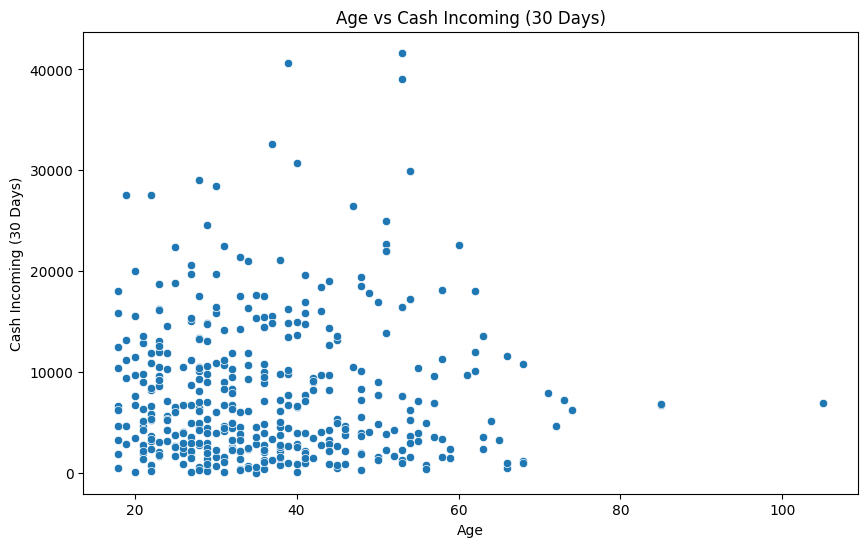

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cash_incoming_30days', data=user_data)
plt.title('Age vs Cash Incoming (30 Days)')
plt.xlabel('Age')
plt.ylabel('Cash Incoming (30 Days)')
plt.show()